In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# to manage the number of places after decimal
pd.set_option('float_format', '{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
# changing the outcome column category to boolean values
diabetes_map = {False:0, True:1}
df["Outcome"] = df.Outcome.map(diabetes_map)


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f2b9ed0>,
      dtype=object)

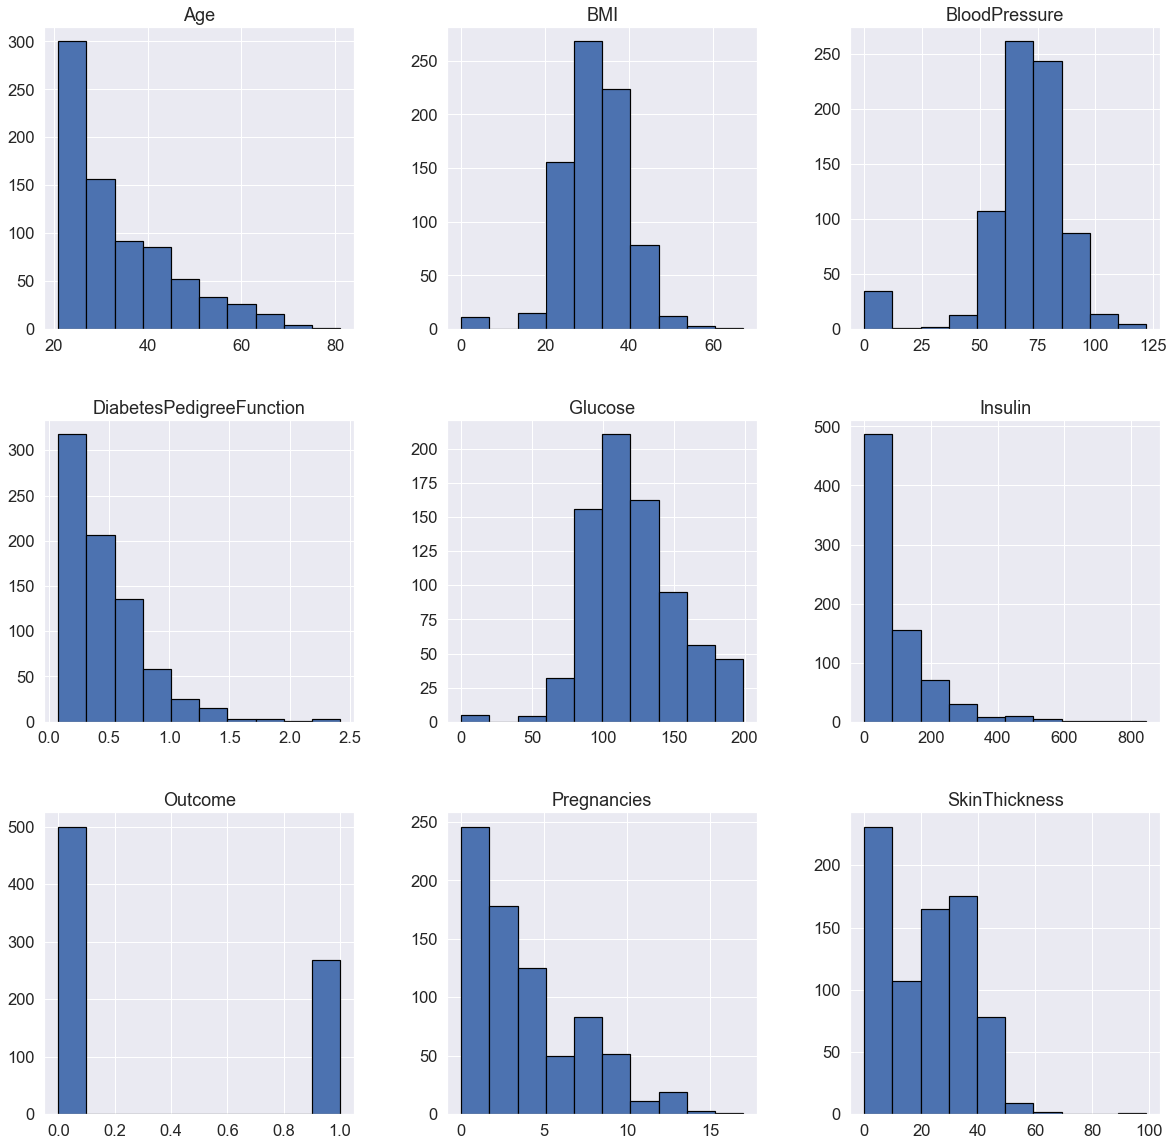

In [9]:
# Visualizing the distribution for every feature
sns.set(font_scale=1.5)
df.hist(edgecolor='black', figsize=(20,20), linewidth=1.2)

<Figure size 2160x2160 with 0 Axes>

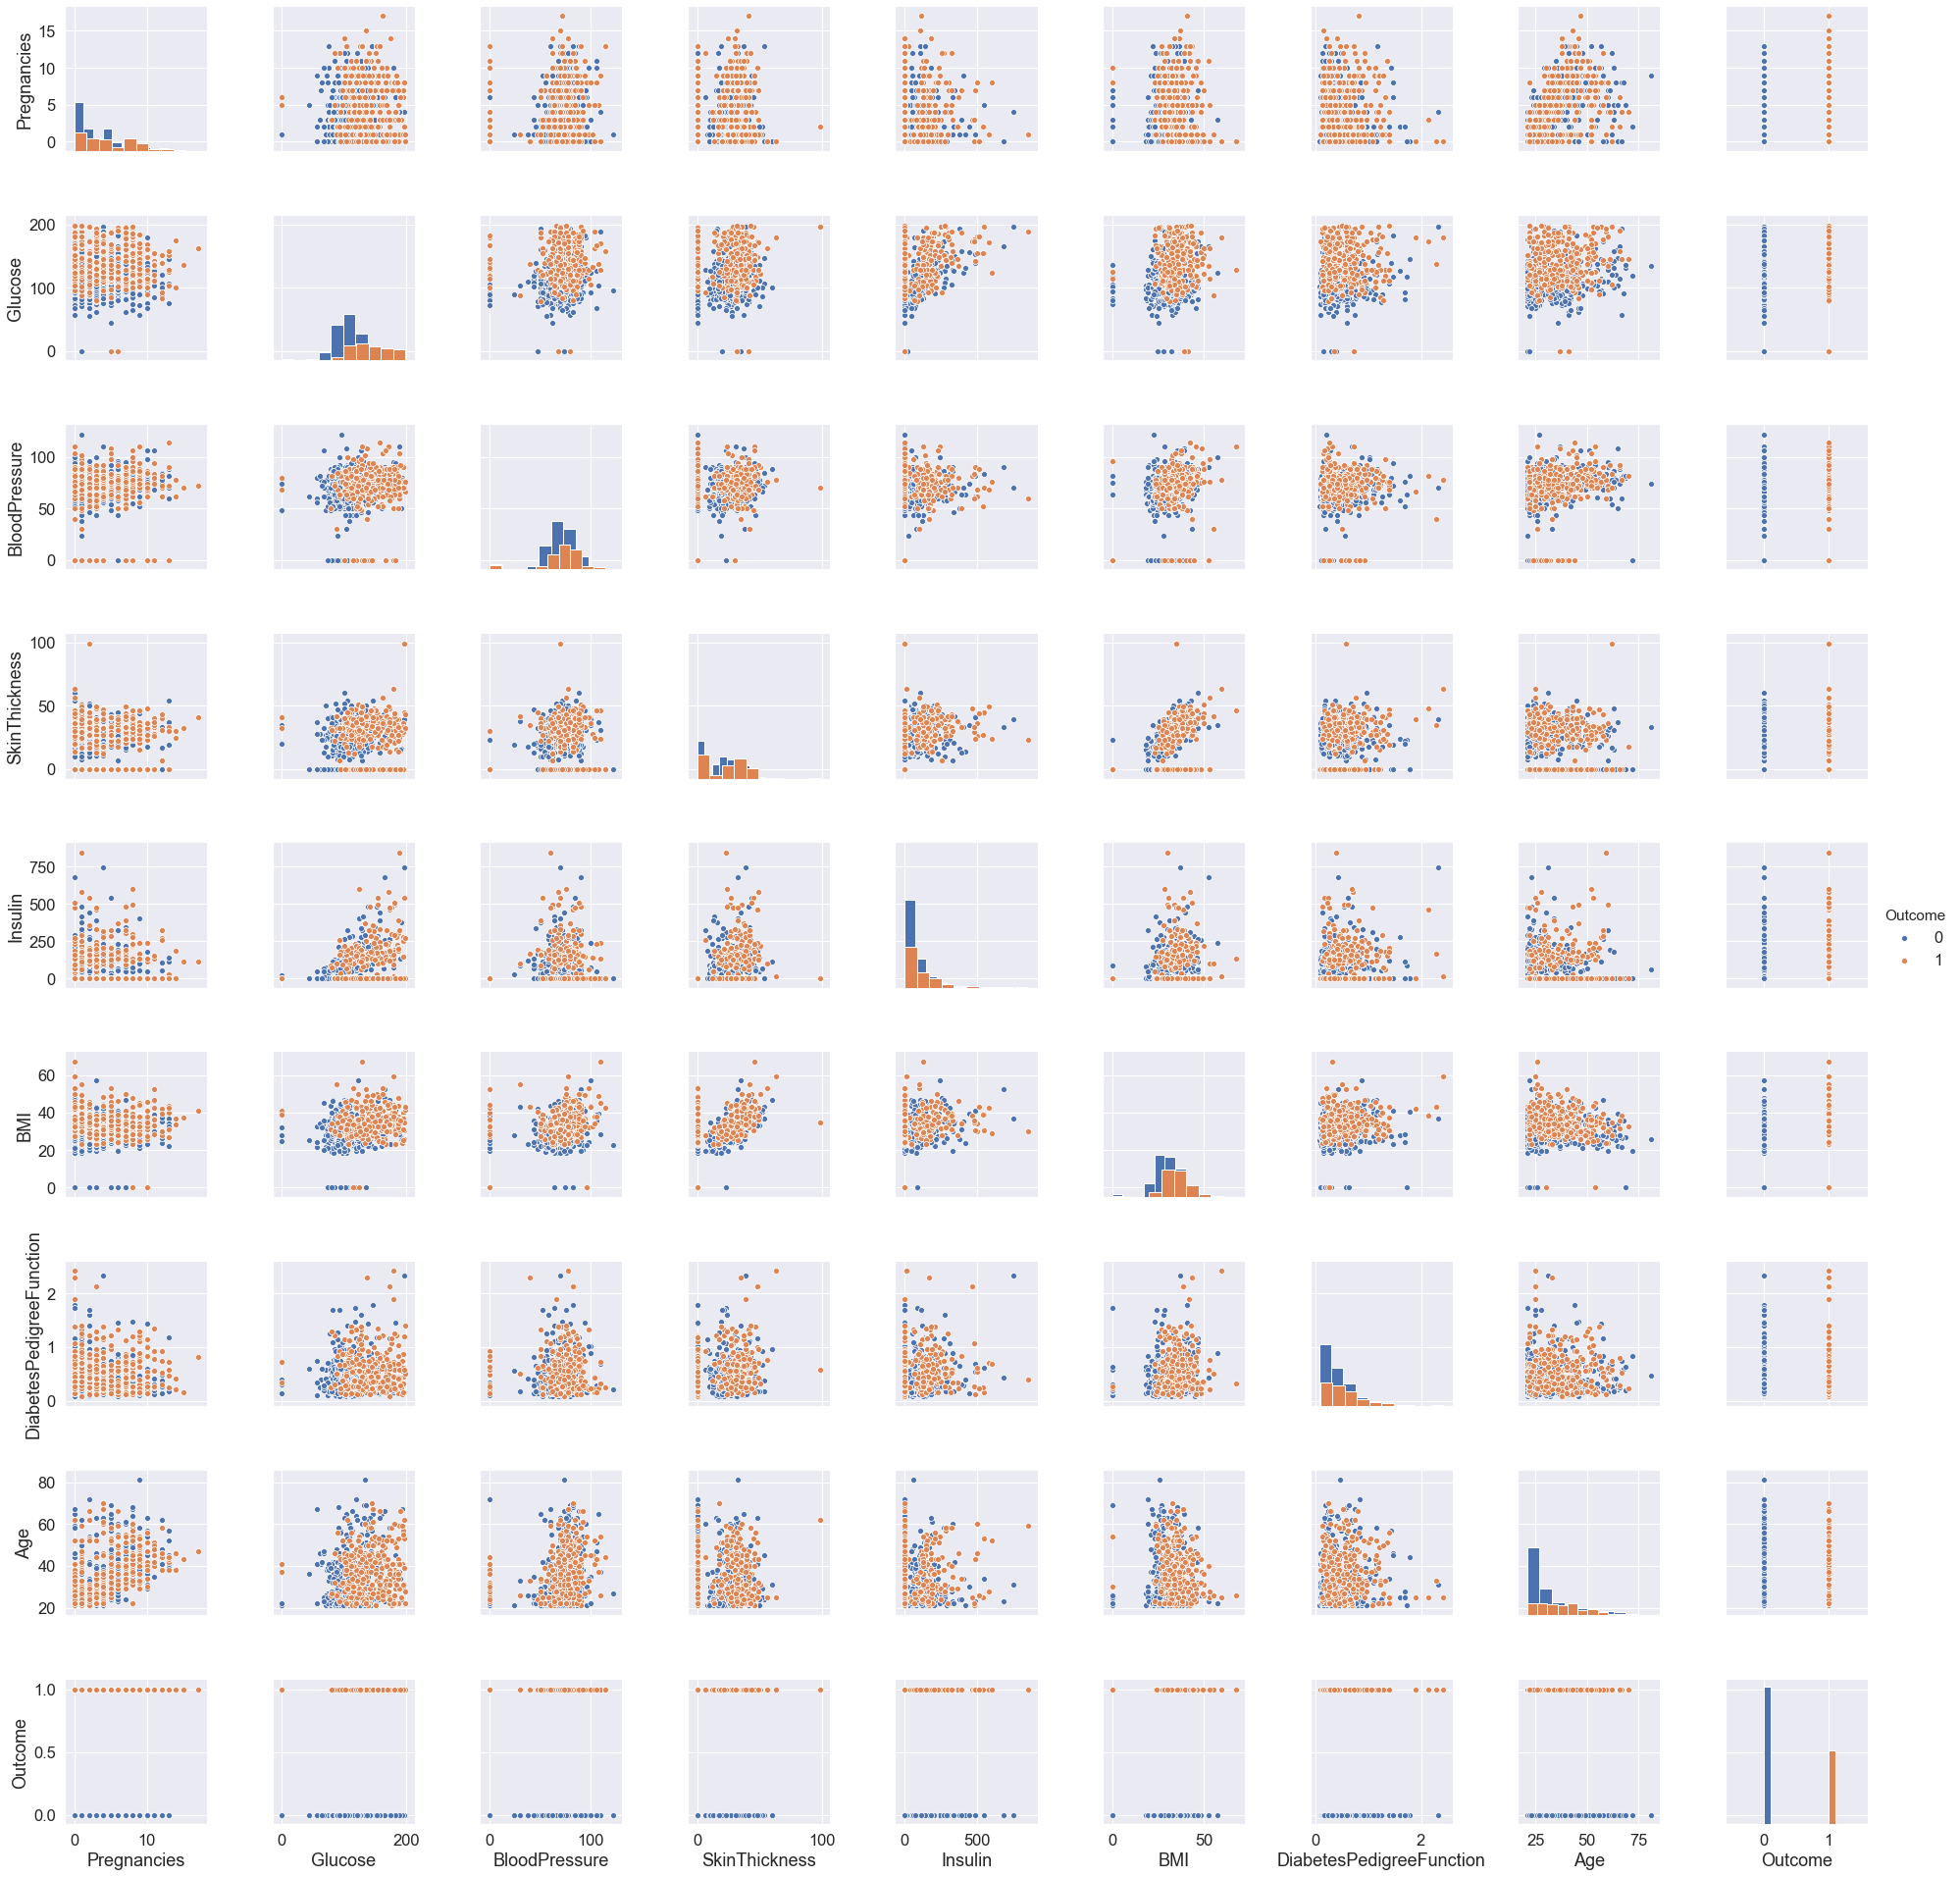

In [10]:
plt.figure(figsize=(30,30))
sns.pairplot(df, hue='Outcome', height=3, diag_kind='hist')

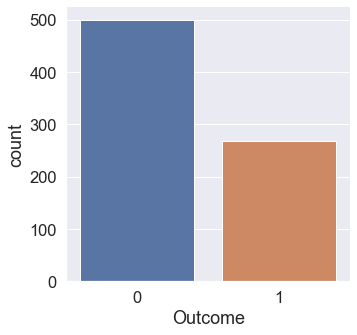

In [11]:
# Lets check the count of the Diabetic 
sns.catplot('Outcome', data=df, kind='count')

Text(0, 0.5, 'Number')

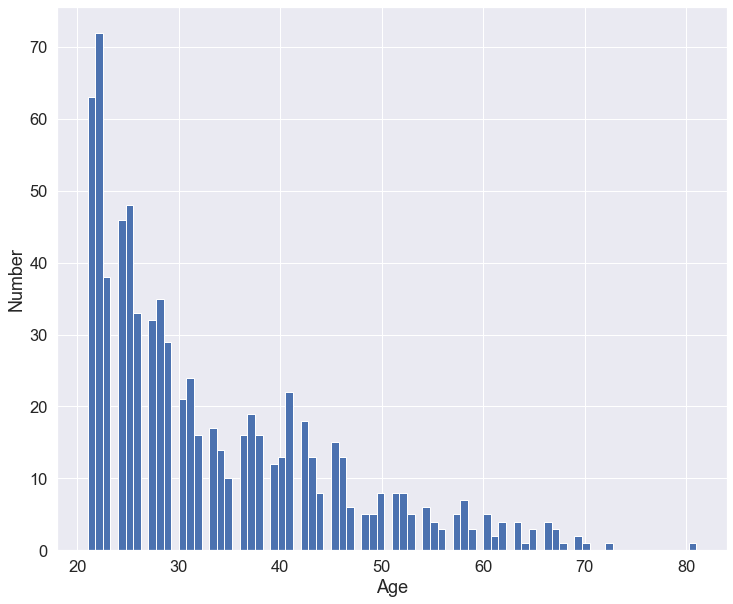

In [12]:
plt.figure(figsize=(12, 10))
df.Age.hist(bins=80)
plt.xlabel('Age')
plt.ylabel('Number')

In [13]:
print('Average age of patients: {:.2f}'.format(df.Age.mean()))

Average age of patients: 33.24


## Relation b/w features as Confusion Matrix

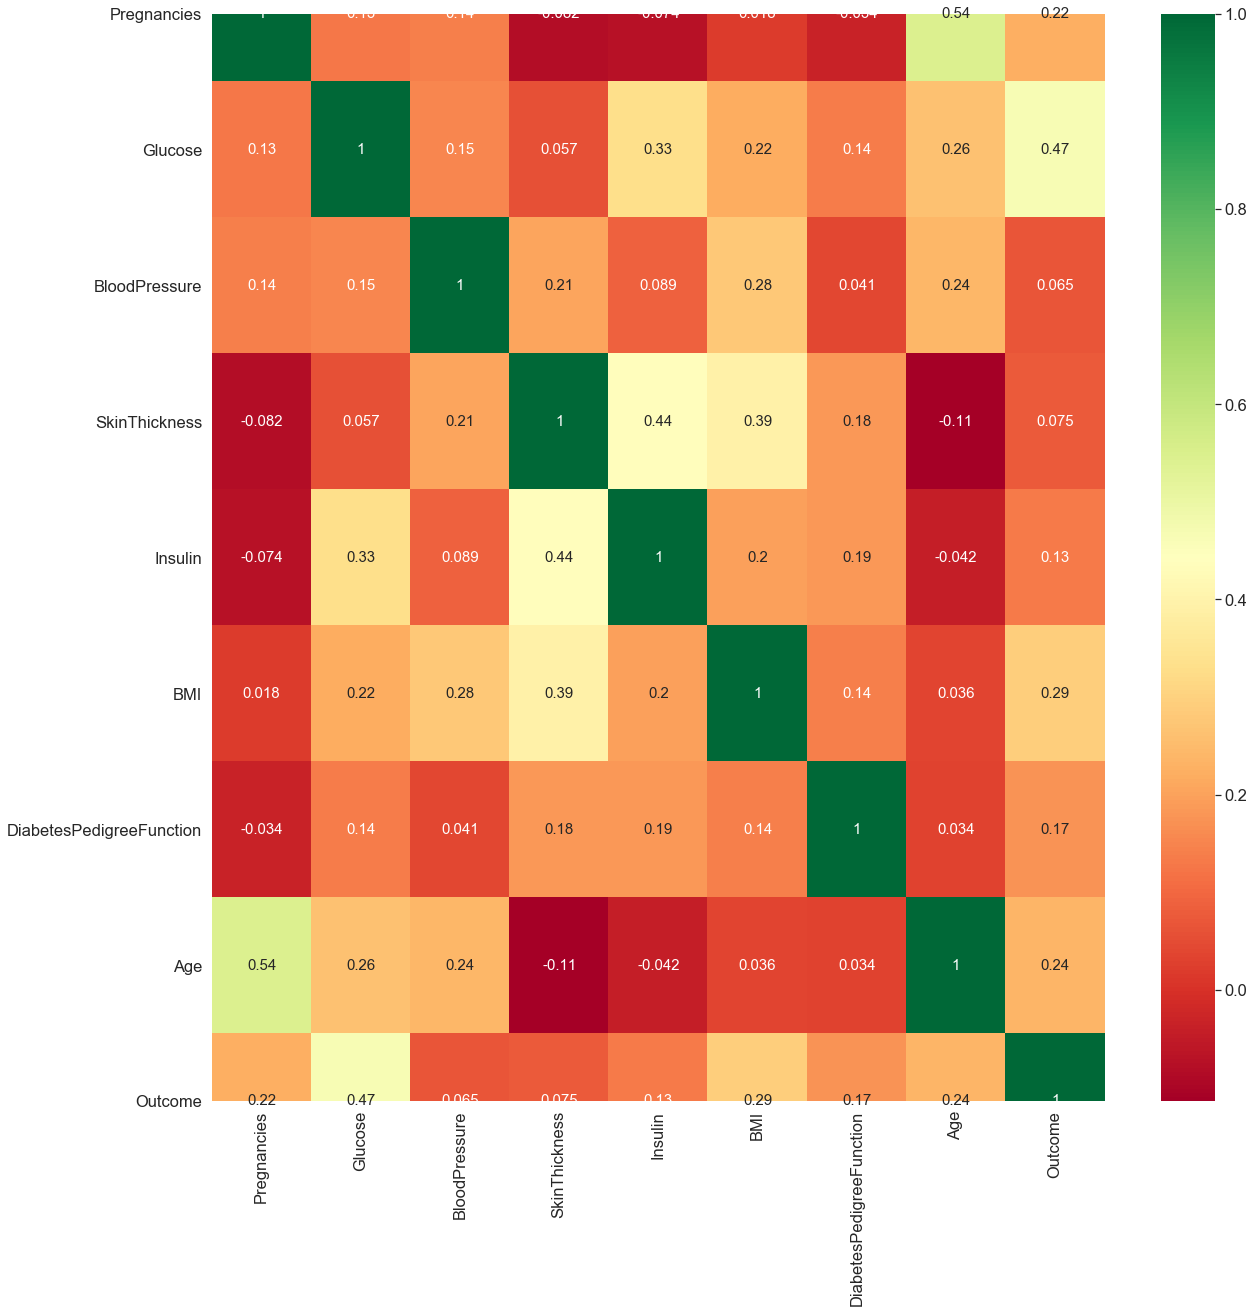

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## 'Data Wrangling' Time 

In [15]:
# All the features
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
len(df['Pregnancies'][df['Pregnancies'] == 0])

111

In [17]:
# Finding missing values as zeros in each feature
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in feature_cols:
    print("*"*40)
    print("{}'s missing zeros:----> {} \n".format(column, len(df[column][df[column] == 0])))

****************************************
Pregnancies's missing zeros:----> 111 

****************************************
Glucose's missing zeros:----> 5 

****************************************
BloodPressure's missing zeros:----> 35 

****************************************
SkinThickness's missing zeros:----> 227 

****************************************
Insulin's missing zeros:----> 374 

****************************************
BMI's missing zeros:----> 11 

****************************************
DiabetesPedigreeFunction's missing zeros:----> 0 

****************************************
Age's missing zeros:----> 0 



In [18]:
# The missing values as zeros can't be ignored and 
# even can't be removed from the features as we'll miss the important data.

# Lets try to replace the missing zeros with some normalized or balanced value such as mean

# Help: https://datascience.stackexchange.com/questions/51890/how-to-use-simpleimputer-class-to-replace-missing-values-with-mean-values-using

from sklearn.impute import SimpleImputer

impt = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[feature_cols] = impt.fit_transform(df[feature_cols])

In [19]:
# Checking the missing values as zeros again

for column in feature_cols:
    print("*"*40)
    print("{}'s missing zeros:----> {} \n".format(column, len(df[column][df[column] == 0])))

****************************************
Pregnancies's missing zeros:----> 0 

****************************************
Glucose's missing zeros:----> 0 

****************************************
BloodPressure's missing zeros:----> 0 

****************************************
SkinThickness's missing zeros:----> 0 

****************************************
Insulin's missing zeros:----> 0 

****************************************
BMI's missing zeros:----> 0 

****************************************
DiabetesPedigreeFunction's missing zeros:----> 0 

****************************************
Age's missing zeros:----> 0 



In [20]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X = df[feature_cols].values
y = df.Outcome.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Now applying different ML algorithms 

In [21]:
# Importing the required libraries

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

---------------------------------------------------------

Some definations for references and understandings:--

### Confusion matrix:
In the field of machine learning and specifically the problem of statistical classification, 
a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).
It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).


### Accuracy score:
The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.
In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [22]:
def display_score(model_name, y_train, y_train_pred, y_test, y_test_pred):
    '''
    Function to print the specified model's Accuracy score & Confusion Matrix for both Train and Test data 
    '''
    print(f"==============================={model_name}===========================================")
    print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

    print(f"=========Test data============ :\n=>Accuracy Score {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

### 1. Logistic Regression 

Some useful understanding:--

### numpy.ravel() :
numpy.ravel(array, order = ‘C’) : returns contiguous flattened array(1D array with all the input-array elements and with the same type as it). A copy is made only if needed.

  x = np.array([[1, 2, 3], [4, 5, 6]])    
  np.ravel(x)

Output:
array([1, 2, 3, 4, 5, 6])




In [23]:
log_reg = LogisticRegression(solver='liblinear')
score = cross_val_score(log_reg, X, y.ravel(), cv=10)
score.mean()

0.7721462747778537

### 2. Decision Tree Classifier

In [24]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":(list(range(10,500,20))), 
          "min_samples_leaf":list(range(1, 20)), 
          "max_features":(None, "auto", "log2") 
          }

model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)

In [25]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 108300 candidates, totalling 324900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 3707 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 12207 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 25507 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 43507 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 65507 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 91507 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 121507 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 155507 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 193507 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 231167 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 274867 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 324900 out of 324900 | elapsed:  9.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid=True, n_job...
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': (None, 'auto', 'log2'),
           

In [26]:
y_train_pred = grid_search_cv.predict(X_train)
y_test_pred = grid_search_cv.predict(X_test)
display_score("Decision Tree Classifier", y_train, y_train_pred, y_test, y_test_pred)

===============================Decision Tree Classifier===========================================
========Train data============ :
=>Accuracy Score 0.7765
=>Confusion Matrix :
[[320  29]
 [ 91  97]]
=========Test data============ :
=>Accuracy Score 0.7532
=>Confusion Matrix :
[[128  23]
 [ 34  46]]


### 3. Bagging Classifier 

In [27]:
bag_clf = BaggingClassifier(base_estimator=model, n_estimators=100, bootstrap=True, 
                            n_jobs=-1, oob_score=True, random_state=42)
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [29]:
y_train_pred = bag_clf.predict(X_train)
y_test_pred = bag_clf.predict(X_test)
display_score("Bagging Classifier", y_train, y_train_pred, y_test, y_test_pred)

===============================Bagging Classifier===========================================
========Train data============ :
=>Accuracy Score 1.0000
=>Confusion Matrix :
[[349   0]
 [  0 188]]
=========Test data============ :
=>Accuracy Score 0.7489
=>Confusion Matrix :
[[118  33]
 [ 25  55]]


### 4.  Random Forest  

In [30]:
randomforest_classifier = RandomForestClassifier(random_state=42, n_estimators=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params_grid = {'max_depth':[3, None], 
               "min_samples_split":[2, 3, 10], 
               "min_samples_leaf":[1, 3, 10], 
               "bootstrap":[True, False], 
               "criterion":["gini", "entropy"]} 

grid_rand_forest = GridSearchCV(randomforest_classifier, params_grid, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=3, iid=True)

In [31]:
grid_rand_forest.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  7.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'bootst

In [32]:
grid_rand_forest.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [33]:
y_train_pred = grid_rand_forest.predict(X_train)
y_test_pred = grid_rand_forest.predict(X_test)
display_scoreplay_score("Random Forest", y_train, y_train_pred, y_test, y_test_pred)

===============================Random Forest===========================================
========Train data============ :
=>Accuracy Score 0.9495
=>Confusion Matrix :
[[395   6]
 [ 25 188]]
=========Test data============ :
=>Accuracy Score 0.7597
=>Confusion Matrix :
[[79 20]
 [17 38]]


### 5. Extra Tree Ensemble

In [34]:
xt_clf = ExtraTreesClassifier(random_state=42, n_estimators=1000)

params_grid = {'max_depth':[3, None], 
               "min_samples_split":[2, 3, 10], 
               "min_samples_leaf":[1, 3, 10], 
               "bootstrap":[True, False], 
               "criterion":["gini", "entropy"]}

grid_xt = GridSearchCV(xt_clf, params_grid, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=3, iid=True)

In [35]:
grid_xt.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=1000, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'bootstrap': [True, False],
  

In [39]:
y_train_pred = grid_xt.predict(X_train)
y_test_pred = grid_xt.predict(X_test)
display_score("Extra Tree Ensemble", y_train, y_train_pred, y_test, y_test_pred)

===============================Extra Tree Ensemble===========================================
========Train data============ :
=>Accuracy Score 1.0000
=>Confusion Matrix :
[[401   0]
 [  0 213]]
=========Test data============ :
=>Accuracy Score 0.7468
=>Confusion Matrix :
[[80 19]
 [20 35]]


### 6. AdaBoost / Adaptative Boosting 

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [37]:
from sklearn.ensemble import AdaBoostClassifier

rand_frst_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=3, 
                                       max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                       min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                                       min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None, 
                                       oob_score=False, random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(rand_frst_clf, n_estimators=1000)
ada_clf.fit(X_train, y_train.ravel())


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=1000,
                          

In [38]:
y_train_pred = grid_rand_forest.predict(X_train)
y_test_pred = grid_rand_forest.predict(X_test)
display_score("AdaBoost / Adaptative Boosting", y_train, y_train_pred, y_test, y_test_pred)

===============================AdaBoost / Adaptative Boosting===========================================
========Train data============ :
=>Accuracy Score 0.9495
=>Confusion Matrix :
[[395   6]
 [ 25 188]]
=========Test data============ :
=>Accuracy Score 0.7597
=>Confusion Matrix :
[[79 20]
 [17 38]]
